## Description

Pedestals capture is a way of capturing the biases of each sample cell of the board, to zero out the ADC counts, which results in a more accurate signal reading. The pedestals controller is the main method of capturing and creating pedestals data which is stored to the board and used for pedestals correction.

### Naludaq Version
*Max Version*: `0.17.2`  
*Min Version*: `0.17.2`

In [ ]:
# Print Naludaq version
import naludaq
print(f"Naludaq version: {naludaq.__version__}")

### Compatible Boards
+ All boards

In [1]:
from naludaq.board import Board, startup_board
from naludaq.tools.pedestals import get_pedestals_controller

In [2]:
# Replace with your board's model and serial number
model, ser_no, baud = 'aardvarcv3', 'CVL6', 1_500_000

In [3]:
BOARD = Board(model)
BOARD.get_ftdi_connection(serial_number=ser_no, baud=baud)

In [4]:
startup_board(BOARD)

Trying [111111, 600000, 1500000]
ident: 42434 - 42434


True

### Generate pedestals
Generated pedestals will be stored under BOARD.pedestals together with the raw data used to build the pedestals.\
Pedestals is stored as a numpy array with the following structure:  
`BOARD.pedestals['data'][channel, window_number, sample_in_window]`

When generating pedestals it can be beneficial to capture "warmup" events to make sure the chip is at operating temperature.\
This is optional and depending on experiment.

In [5]:
peds_ctrl = get_pedestals_controller(BOARD)
peds_ctrl.generate_pedestals()

### To plot the pedestals, use the code below
The structure of the captured pedestals is designed for fast subtraction rather than plotting.
By reshaping the pedestals they can be plotted.

In [6]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#reshape the data for easier plotting
_shape = BOARD.pedestals['data'].shape
_pedestals = BOARD.pedestals['data'].reshape(_shape[0], _shape[1]*_shape[2])

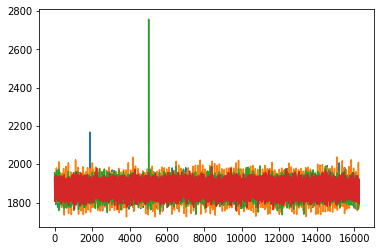

In [8]:
plt.plot(_pedestals.T)

### Advanced section
1. capture pedestals for a specific channel only
2. set warmup and datapoints per sample
3. plot pedestals for specific windows/channels
4. examine block capture times

#### 1. Capture specific channels

In [ ]:
peds_ctrl = get_pedestals_controller(BOARD, channels=[0,3])
peds_ctrl.generate_pedestals()

In [13]:
_shape = BOARD.pedestals['data'].shape
_pedestals = BOARD.pedestals['data'].reshape(_shape[0], _shape[1]*_shape[2])

for idx, ch in [(idx, d) for idx, d in enumerate(_pedestals) if not np.isnan(np.sum(d))]: # deactivated channels contains np.nan for all values
    plt.plot(ch, label=f'ch{idx}')
plt.legend()
plt.xlim(0,256)

#### 2. set the number of warmup events and datapoints per sample

In [20]:
peds_ctrl = get_pedestals_controller(BOARD, num_captures=5, num_warmup_events=5)
peds_ctrl.generate_pedestals()

#### 3. Plot a specific window or specific samples of the pedestal data

(0.0, 256.0)

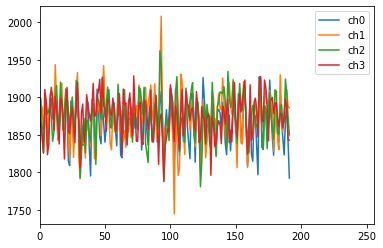

In [23]:
# Plot window 10,11,12
_shape = BOARD.pedestals['data'].shape
_pedestals = BOARD.pedestals['data'][:, 10:13, :].reshape(_shape[0], (13-10)*_shape[2])

for idx, ch in [(idx, d) for idx, d in enumerate(_pedestals) if not np.isnan(np.sum(d))]: # deactivated channels contains np.nan for all values
    plt.plot(ch, label=f'ch{idx}')
plt.legend()
plt.xlim(0,256)

(0.0, 50.0)

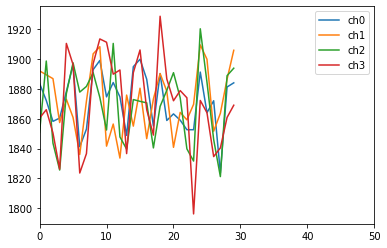

In [25]:
# Plot first 10 samples from window 10,11,12
_shape = BOARD.pedestals['data'].shape
_pedestals = BOARD.pedestals['data'][:, 10:13, :10].reshape(_shape[0], (13-10)*10)

for idx, ch in [(idx, d) for idx, d in enumerate(_pedestals) if not np.isnan(np.sum(d))]: # deactivated channels contains np.nan for all values
    plt.plot(ch, label=f'ch{idx}')
plt.legend()
plt.xlim(0,50)

#### 4. Examine pedestals block capture times

Jumps in the timing within the same block can indicate that not enough data was captured the first time due to a problem. Depending on the pedestals controller used, different events within the same block may come from different readouts.


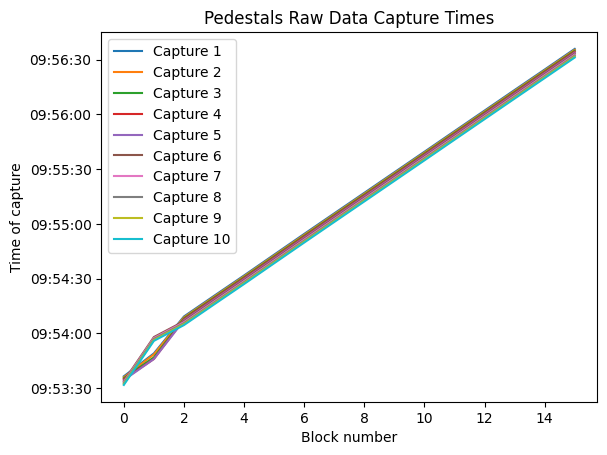

In [9]:
_times = BOARD.pedestals['times']
plt.plot(_times, label=[f'Capture {i+1}' for i in range(_times.shape[1])])
plt.title('Pedestals Raw Data Capture Times')
plt.xlabel('Block number')
plt.ylabel('Time of capture')
plt.legend();